# Проект: Исследовательский анализ данных

## Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

**План выполнения работы:**
* **1. Откроем файл с данными и изучим общую информацию.** 
* **2. Предобработка данных**
  * 2.1 Заполняем пропуски
  * 2.2 Убраем аномальные значения
  * 2.3 Посчитаем и добавим в таблицу новые столбцы
  * 2.4 Изменение типов данных.
* **3. Исследовательский анализ данных:**
  * 3.1 Задача 1. Изучите следующие параметры объектов:
  * 3.2 Задача 2. Посмотрим на данные и гистограмму по времени продажи квартиры
  * 3.3 Задача 3. Какие факторы больше всего влияют на стоимость квартиры?
  * 3.4 Задача 4. Выберать 10 населённых пунктов с наибольшим числом объявлений
  * 3.5 Задача 5.Выделить квартиры в Санкт-Петербурге и вычислите среднюю цену каждого километра
* **4. Общий вывод**



**Описание данных:**

Данные сервиса объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.
Присутствуют как автоматически собираемые, так и вручную заполненные данные.

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
*`ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах(м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

## 1. Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime # для получения дня недели из даты
pd.set_option('display.max_columns', None)

In [2]:
pth1 = 'C:/Users/copok/Documents/Проекты/Яндекс практикум/3 Исследовательский анализ данных/real_estate_data.csv'
pth2 = '/datasets/real_estate_data.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1, sep= '\t')
elif os.path.exists(pth2):
    df= pd.read_csv(pth2, sep= '\t')
else:
    print('Something is wrong')

In [3]:
display(df.sample(5))
print('-'*50)
df.info()
print('-'*50)
print('Количество дублированных строк:', sum(df.duplicated()))
print()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2957,9,15450000.0,97.1,2016-07-04T00:00:00,2,3.65,4.0,57.8,1,NaN,False,False,10.6,0.0,Санкт-Петербург,22704.0,1313.0,2.0,684.0,3.0,29.0,141.0
23515,5,5050000.0,40.0,2017-10-31T00:00:00,1,3.00,17.0,18.0,2,NaN,False,False,13.0,NaN,Санкт-Петербург,35039.0,11296.0,0.0,NaN,0.0,NaN,34.0
18915,10,2950000.0,31.0,2017-10-15T00:00:00,1,NaN,9.0,16.0,3,NaN,False,False,7.0,0.0,Санкт-Петербург,18186.0,13542.0,0.0,NaN,0.0,NaN,31.0
553,1,4700000.0,61.3,2017-05-22T00:00:00,2,2.75,18.0,26.0,6,False,False,False,13.8,1.0,Санкт-Петербург,41924.0,21240.0,0.0,NaN,0.0,NaN,60.0
19606,5,4100000.0,51.0,2017-12-06T00:00:00,2,2.60,9.0,27.2,6,NaN,False,False,9.4,2.0,Санкт-Петербург,14331.0,13127.0,2.0,722.0,2.0,526.0,47.0


--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name      

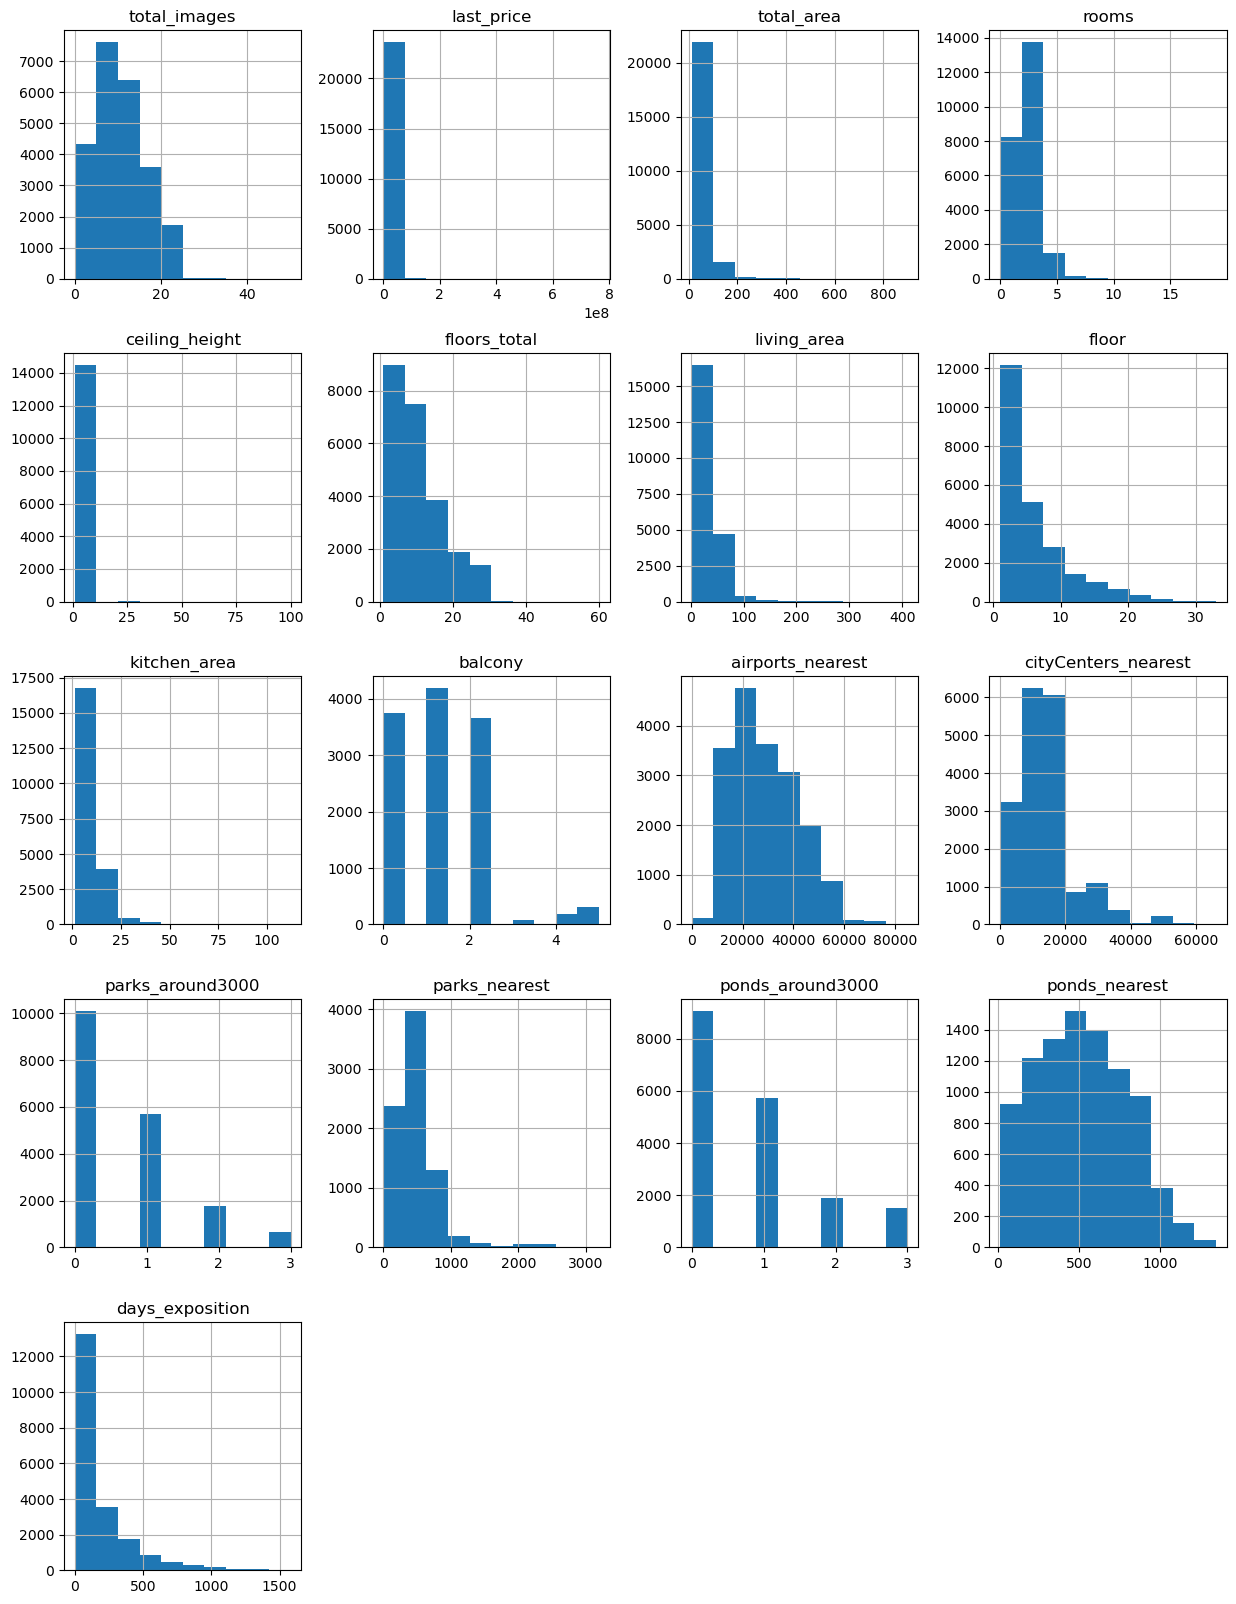

In [4]:
df.hist(figsize=(15, 20));

**Заметил следующее:**
* `first_day_exposition` - object - должен быть тип datetime
* `ceiling_height` - нулевые значения
* `floors_total` - должен быть тип int, т.к. количество этажей - целое значение + нулевые значения
* `is_apartment` - должен быть тип bool + нулевые значения
* `living_area` - нулевые значения
* `kitchen_area` - нулевые значения
* `balcony` - нулевые значения
* `locality_name` - нулевые значения
* `airports_nearest` - нулевые значения
* `cityCenters_nearest` - нулевые значения
* `parks_around3000` - тип должен быть int + нулевые значения
* `parks_nearest` - нулевые значения
* `ponds_around3000` - тип должен быть int + нулевые значения
* `ponds_nearest` - нулевые значения
* `days_exposition` - тип должен быть int + нулевые значения

## 2. Предобработка данных

### 2.1 Заполняем пропуски

In [5]:
df.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3721,8,3150000.0,29.0,2017-03-06T00:00:00,1,NaN,9.0,15.2,1,NaN,False,False,6.1,0.0,Санкт-Петербург,27616.0,12199.0,0.0,NaN,0.0,NaN,121.0
260,8,17250000.0,102.4,2014-12-09T00:00:00,3,NaN,8.0,53.2,3,NaN,False,False,19.3,1.0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,NaN
3540,18,5150000.0,46.4,2018-01-22T00:00:00,2,2.5,7.0,28.3,3,NaN,False,False,7.2,NaN,Санкт-Петербург,27753.0,6692.0,1.0,860.0,1.0,694.0,120.0
13214,3,2060000.0,32.3,2017-05-11T00:00:00,1,NaN,3.0,NaN,2,NaN,False,False,11.3,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,45.0
13479,17,6850000.0,62.2,2016-07-01T00:00:00,3,NaN,5.0,41.8,3,NaN,False,False,10.4,0.0,Санкт-Петербург,24453.0,4859.0,1.0,269.0,0.0,NaN,182.0


* При первом изучении в таблице очень много `NaN`.

**Посчитаем количесто пропусков**

In [6]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**is_apartment**

In [7]:
print('Количество NaN в столбце is_apartment:', df['is_apartment'].isnull().sum())
df['is_apartment'].value_counts()

Количество NaN в столбце is_apartment: 20924


is_apartment
False    2725
True       50
Name: count, dtype: int64

* Из данных видно что присутствуют оба значения. 
* Но заполнять пропуски значением `False` не будем, т.к. если мы это сделаем, то мы скажем, что во всём датафрейме 23699 строк и из них всего 50 апартаментов, я думаю что это не соотноситься с реальностью.
* Предпологаю что эти пропуски возникли из-за того что люди просто не понимают разницу между квартирой и аппартаментами.

**balcony**

* Заменим пропуски на 0 (т.е отсутствует).
* Предпологаю что эти пропуски возникли из-за того что люди просто не указали наличия балкона.

In [8]:
df['balcony'] = df['balcony'].fillna(0)
print('Количество NaN в столбце balcony:', df['balcony'].isnull().sum())

Количество NaN в столбце balcony: 0


**kitchen_area and living_area**

In [9]:
print('Количество NaN по kitchen_area:', df['kitchen_area'].isnull().sum())
print('Количество NaN по living_area:', df['living_area'].isnull().sum())

Количество NaN по kitchen_area: 2278
Количество NaN по living_area: 1903


* Это важные данные,но подставлять среднее  не правильно, потому-что может быть и частный дом большой площади
или квартира квадратов на 40 из которых 30 кухня. 
* Я думаю что пропуски в оснавном в студиях.

In [10]:
df.query('rooms == 0')[['kitchen_area', 'living_area']].isnull().sum()

kitchen_area    197
living_area      14
dtype: int64

* Лишь малая часть пропусков по этим столбцам относится к студиям. 
* Да и с ними нам нечего делать - не делить же пополам общую площадь. 
* Оставляем как есть.

* Помоему данные незаполнены по той причине, что они необязательны к заполнению, а высчитывать жилую площадь/площадь кухни людям некогда. 
* Также выяснили, нет ли такой связи, что если `квартира - студия`, то там отсутствуют эти данные. 
* Ведь в них нет явного деления площади на ту, которая относится к `кухне`, и ту, которая относится к `жилой площади`;

**parks_nearest and ponds_nearest** 

* Вполне возможно, что данные просто не были выгружены системой. 
* Беря в расчет то, что это далеко не самые важные параметры, и отсутствие возможности проставить какое-либо адекватные расстояние, которое не испортит статистику по уже присутствующим данным по этим столбцам, предлагаю здесь не трогать пропуски, учитывая, что есть достаточное количество строк, где данные присутствуют, и по ним можно сделать срез и заметить определенные тенденции.

**parks_around3000 and ponds_around3000**

Аналогично как и с `parks_nearest` и `ponds_nearest` - данные просто не были заполнены. Пропуски в них не трогаем.

**airports_nearest**

In [11]:
print('Количество NaN в столбце airports_nearest:', df['airports_nearest'].isnull().sum())

Количество NaN в столбце airports_nearest: 5542


* Для таких объектов я зарезервировал значение 0 метров. 
* В дальнейшем исследовании, будем ингорировать это значение, указывая диапазон от 1 метра.


In [12]:
df['airports_nearest'] = df['airports_nearest'].fillna(0)
print('Количество NaN в столбце airports_nearest:', df['airports_nearest'].isnull().sum())

Количество NaN в столбце airports_nearest: 0


* Пропуски помоему из-за того что эти данные рассчитывала система. 
* Они могут отустствовать по причине того, что относительно конкретно взятого населенного пункта/точки искались расстояние в определенном радиусе. 
* Если в пределах этого радиуса ни аэропорта, ни центра не было, то и указать в этом столбце системе было нечего. 


**cityCenters_nearest**

Анологично заменяем пропуски в **cityCenters_nearest**

In [13]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(0)
print('Количество NaN в столбце cityCenters_nearest:', df['cityCenters_nearest'].isnull().sum())

Количество NaN в столбце cityCenters_nearest: 0


**ceiling_height**

In [14]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].mean())
#df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [15]:
df['ceiling_height'].sample(10)

5656     2.500000
12638    2.771499
14254    2.600000
19055    2.500000
6320     2.771499
6407     2.600000
11739    2.771499
6254     2.600000
5041     2.771499
8092     2.500000
Name: ceiling_height, dtype: float64

In [16]:
print('Количество NaN в столбце ceiling_height:', df['ceiling_height'].isnull().sum())

Количество NaN в столбце ceiling_height: 0


* Предполагаю, что некоторые не считают это обязательным для заполнения пунктом и поэтому не предприняли никаких действий для того, чтоб узнать высоту своих потолков, иначе бы данные присутствовали.
* Заполнить такие пропуски можно средним значением(медианное значение отличается незначительно) потому что высота потолков в среднем стандартная(исключением можно считать дома старой постройки(например Сталинки) но люди которые продают квартиры в таких домах не забывают указать высоту таких потолко т.к они очень высокие)

**locality_name**

In [17]:
df = df.dropna(subset=['locality_name']) # удалям пропуски

In [18]:
print('Количество NaN в столбце locality_name:', df['locality_name'].isnull().sum())

Количество NaN в столбце locality_name: 0


* Удалил пропуски в `locality_name` потому что их слишком мало (всего 49) и я думаю что это не повлияет на дальнейшее исследование.
* Пропуски помоему появились из-за того что продавец не указал значение.

**floors_total**

In [19]:
df = df.dropna(subset=['floors_total']) # удалям пропуски

In [20]:
print('Количество NaN в столбце floors_total:', df['floors_total'].isnull().sum())

Количество NaN в столбце floors_total: 0


* Удалил пропуски в **floors_total** потому что их слишком мало (всего 86) и я думаю что это не повлияет на дальнейшее исследование.
* Помоему данные могут отсутствать по причине необязательности заполнения этих столбцов.

**days_exposition**

In [21]:
print('Количество NaN по days_exposition:', df['days_exposition'].isnull().sum())

Количество NaN по days_exposition: 3171


* Помоему информация может отсутствовать, например, по причине того, что неизвестно когда было закрыто объявление о продаже, т.е., фактически, сделка была совершена, но не была закрыта на онлайн-ресурсе.
* По той же причине можем получить результаты в виде срока продажи квартиры в несколько лет.
* Тем не менее, проставлять информацию о сроках продажи наугад не стоит. 
* Здесь "среднее"/"медиана" не подойдут. 
* Поэтому оставляем этот столбец в покое.

**Изучаем и заменям уникальные значения в столбце `locality_name`**

In [22]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')

In [23]:
df['locality_name'] = df['locality_name'].str.replace('поселок городского типа', 'поселок')

In [24]:
df['locality_name'] = df['locality_name'].str.replace('городской поселок', 'поселок')

In [25]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

In [26]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,23565.000000,23565.000000,18065.000000,8030.000000,18065.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.771366,10.675875,34.454822,5.878124,10.560994,0.593677,22046.601697,10879.530617,0.611569,490.580448,0.769499,518.289509,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,0.989266,6.594823,22.045359,4.871485,5.900630,0.960660,16462.135803,9639.346166,0.802088,341.572956,0.938669,278.009558,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,10143.000000,2186.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.771499,9.000000,30.000000,4.000000,9.100000,0.000000,21854.000000,11246.000000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.771499,16.000000,42.300000,8.000000,12.000000,1.000000,34324.000000,15237.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


* На мой взгляд с данными все нормально, можно работать из особеностей можно отметить что максисамльная высота потолка 100 метров и максимальная площадь кухни 112 метров.

### 2.2 Убраем аномальные значения

**total_area**

In [27]:
df = df.query('(20 < total_area < 300) | total_area.isna()')
df['total_area'].describe()

count    23467.000000
mean        59.462202
std         30.411689
min         20.100000
25%         40.000000
50%         52.000000
75%         69.300000
max        297.500000
Name: total_area, dtype: float64

**last_price**

In [28]:
df = df.query('(last_price < 20000000) | last_price.isna()')
df['last_price'].describe()

count    2.280800e+04
mean     5.412579e+06
std      3.191289e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.550000e+06
75%      6.500000e+06
max      1.999900e+07
Name: last_price, dtype: float64

**rooms**

In [29]:
df = df.query('(rooms < 8) | rooms.isna()')
df['rooms'].describe()

count    22800.000000
mean         2.008333
std          0.974485
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

**ceiling_height**

In [30]:
df = df.query('(2 < ceiling_height < 5) | ceiling_height.isna()')
df['ceiling_height'].describe()

count    22754.000000
mean         2.733347
std          0.199086
min          2.200000
25%          2.600000
50%          2.771499
75%          2.771499
max          4.800000
Name: ceiling_height, dtype: float64

* Анамлии оброботаны

### 2.3 Посчитаем и добавим в таблицу новые столбцы

* Приступим к добалению новых столбцов. 
* Потом найдем столбцы, в которых нужно изменить тип данных и преобразуем тип данных сразу во всех нужных столбцах.

Изменяем формат столбца **first_day_exposition** на **datetime**:

In [31]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#### Добавление новых столбцов

**Посчитаем и добавим цену квадратного метра**

In [32]:
df['price_of_m2'] = df['last_price']/df['total_area']

**Добавим год, месяц публикации объявления**

In [33]:
df['year_exposition'] = df['first_day_exposition'].dt.year
df['month_exposition'] = df['first_day_exposition'].dt.month

**Добавим день недели публикации объявления**

In [34]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday

**Добавим категорию по этажам (варианты — `'первый'`, `'последний'`, `'другой'`)**

In [35]:
df['level'] = np.where(df['floor'] == 1, 'первый', 'другой')
df['level'] = np.where(df['floor'] == df['floors_total'], 'последний', df['level'])

**Добавим столбцы с соотношением жилой и общей площади, а также с отношением площади кухни к общей**

In [36]:
df['living_area_part'] = df['living_area']/df['total_area']
df['kitchen_area_part'] = df['kitchen_area']/df['total_area']

**Добавим расстояние до центра города в километрах**

In [37]:
df['cityCenters_nearest'] = (df[df['cityCenters_nearest'].notnull()]['cityCenters_nearest']/1000*1.0).round().astype(int)
df['price_of_m2'] = (df[df['price_of_m2'].notnull()]['price_of_m2']/1000*1.0).round(3)

### 2.4 Изменение типов данных.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22754 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22754 non-null  int64         
 1   last_price            22754 non-null  float64       
 2   total_area            22754 non-null  float64       
 3   first_day_exposition  22754 non-null  datetime64[ns]
 4   rooms                 22754 non-null  int64         
 5   ceiling_height        22754 non-null  float64       
 6   floors_total          22754 non-null  float64       
 7   living_area           21000 non-null  float64       
 8   floor                 22754 non-null  int64         
 9   is_apartment          2656 non-null   object        
 10  studio                22754 non-null  bool          
 11  open_plan             22754 non-null  bool          
 12  kitchen_area          20655 non-null  float64       
 13  balcony              

**приведения к типу int**

In [39]:
list_to_int = ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
               'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition', 'price_of_m2']
#Список столбцов для приведения к типу int

In [40]:
for column in list_to_int:
    df[column] = df[df[column].notnull()][column].astype('int')
#Изменяем на тип int

**округляем данные до 1 знака после запятой**

In [41]:
list_to_float_1 = ['total_area', 'ceiling_height', 'living_area', 'kitchen_area']
#Столбцы, где округляем данные до 1 знака после запятой

In [42]:
for column in list_to_float_1:
    df[column] = df[df[column].notnull()][column].round(1)
#Округляем до 1 знака после запятой

**округляем данные до 2 знаков после запятой**

In [43]:
list_to_float_1 = ['living_area_part', 'kitchen_area_part']
#Столбцы, где округляем данные до 2 знаков после запятой

In [44]:
for column in list_to_float_1:
    df[column] = df[df[column].notnull()][column].round(2)
#Округляем до 2 знаков после запятой

In [45]:
df.sample(5)#Проверяем, что получилось

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_of_m2,year_exposition,month_exposition,weekday_exposition,level,living_area_part,kitchen_area_part
22250,11,4700000,45.7,2018-03-27,2,2.8,9,28.0,8,NaN,False,False,7.0,0,Санкт-Петербург,19749,11,0.0,NaN,0.0,NaN,219.0,102,2018,3,1,другой,0.61,0.15
5848,13,3300000,82.4,2018-11-17,4,3.0,4,54.3,1,NaN,False,False,10.4,0,Сертолово,0,0,NaN,NaN,NaN,NaN,10.0,40,2018,11,5,первый,0.66,0.13
9736,20,15500000,215.2,2018-10-06,4,2.8,5,94.0,2,NaN,False,False,16.4,0,поселок Стрельна,28815,24,0.0,NaN,1.0,969.0,NaN,72,2018,10,5,другой,0.44,0.08
20234,6,5090000,60.0,2015-12-08,3,2.8,13,NaN,2,NaN,False,False,NaN,0,деревня Кудрово,0,0,NaN,NaN,NaN,NaN,798.0,84,2015,12,1,другой,NaN,NaN
19179,3,4150000,35.9,2018-08-03,1,2.8,20,NaN,7,NaN,False,False,NaN,0,Санкт-Петербург,35250,16,0.0,NaN,1.0,400.0,45.0,115,2018,8,4,другой,NaN,NaN


* Столбец `last_price` приведем к тысячам, а то слишком много нулей. 
* Ну и соответственно тоже самое проделаем для `price_of_m2`, только там оставим 3 знака после запятой.

In [46]:
df['last_price'] = (df[df['last_price'].notnull()]['last_price']/1000*1.0).round().astype(int)
df['price_of_m2'] = (df[df['price_of_m2'].notnull()]['price_of_m2']/1000*1.0).round(3)
df.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_of_m2,year_exposition,month_exposition,weekday_exposition,level,living_area_part,kitchen_area_part
4556,8,11500,129.0,2018-08-21,5,3.0,5,75.0,2,NaN,False,False,11.0,0,Санкт-Петербург,23037,5,0.0,NaN,0.0,NaN,27.0,0.089,2018,8,1,другой,0.58,0.09
8765,14,4100,42.4,2018-02-28,2,2.5,5,27.7,4,NaN,False,False,6.0,1,Санкт-Петербург,11903,9,1.0,496.0,1.0,861.0,65.0,0.096,2018,2,2,другой,0.65,0.14
12457,6,3650,46.0,2018-02-21,2,2.6,5,28.2,2,NaN,False,False,7.5,0,Санкт-Петербург,21793,14,1.0,501.0,0.0,NaN,26.0,0.079,2018,2,2,другой,0.61,0.16
15046,14,5810,44.7,2018-10-15,1,2.7,25,16.1,17,NaN,False,False,13.0,0,Санкт-Петербург,35742,15,0.0,NaN,0.0,NaN,10.0,0.129,2018,10,0,другой,0.36,0.29
18383,9,4450,39.0,2015-05-21,1,2.8,22,18.0,15,False,False,False,16.0,1,Санкт-Петербург,33367,14,0.0,NaN,0.0,NaN,517.0,0.114,2015,5,3,другой,0.46,0.41


## 3. Исследовательский анализ данных:

### 3.1 Задача 1. Изучите следующие параметры объектов:

* `общая площадь`;
* `жилая площадь`;
* `площадь кухни`;
* `цена объекта`;
* `количество комнат`;
* `высота потолков`;
* `этаж квартиры`;
* `тип этажа квартиры («первый», «последний», «другой»)`;
* `общее количество этажей в доме`;
* `расстояние до центра города в метрах`;
* `расстояние до ближайшего аэропорта`;
* `расстояние до ближайшего парка`;
* `день и месяц публикации объявления`.

**Изучим общую площадь**

count    22754.000000
mean        56.641074
std         24.266148
min         20.100000
25%         40.000000
50%         51.000000
75%         67.000000
max        287.500000
Name: total_area, dtype: float64

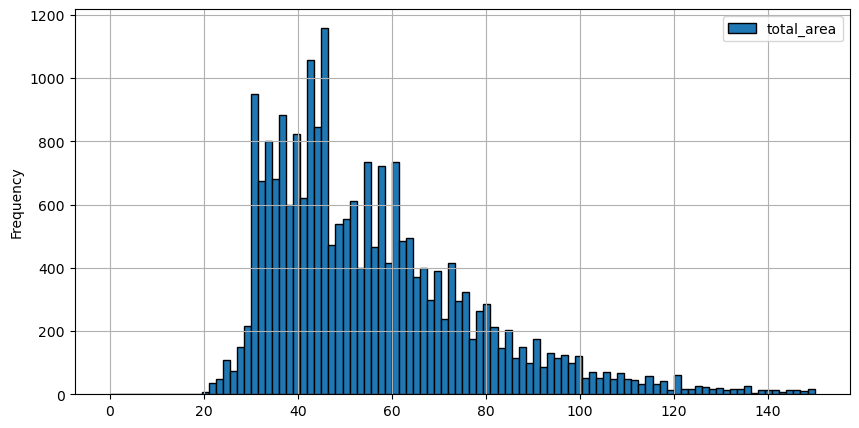

In [47]:
df.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (10,5), range = (0, 150), ec='black')
df['total_area'].describe()

* Большая часть квартир имеет метраж от 30 до 80 кв.м., пик приходится на ~50 кв.м.

**Изучим общую жилую площадь**

count    21000.000000
mean        32.497557
std         16.465990
min          2.000000
25%         18.500000
50%         30.000000
75%         41.300000
max        183.700000
Name: living_area, dtype: float64

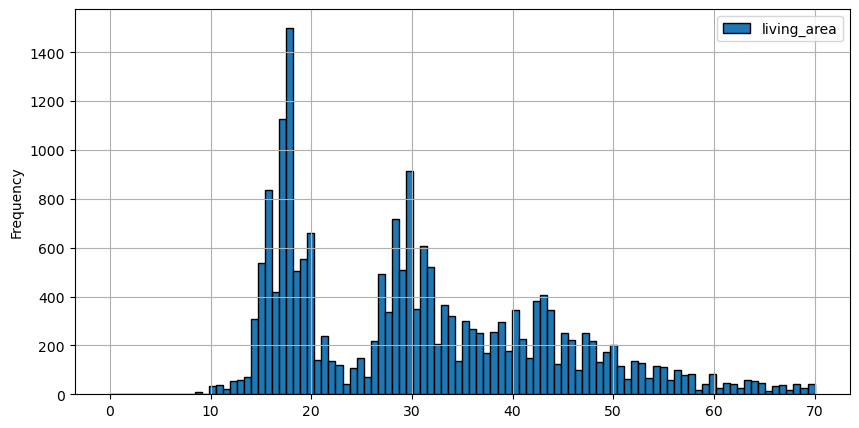

In [48]:
df.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (10,5), range = (0, 70), ec='black')
df['living_area'].describe()

* Большая часть квартир имеет жилую площадь от 15 до 45 кв.м., пик приходится на 18 и 30 кв.м. Скорее всего это 1 и 2 комнатные квартиры.

**Изучим  площадь кухни**

count    20655.000000
mean        10.106478
std          4.711577
min          1.300000
25%          7.000000
50%          9.000000
75%         11.500000
max        100.700000
Name: kitchen_area, dtype: float64

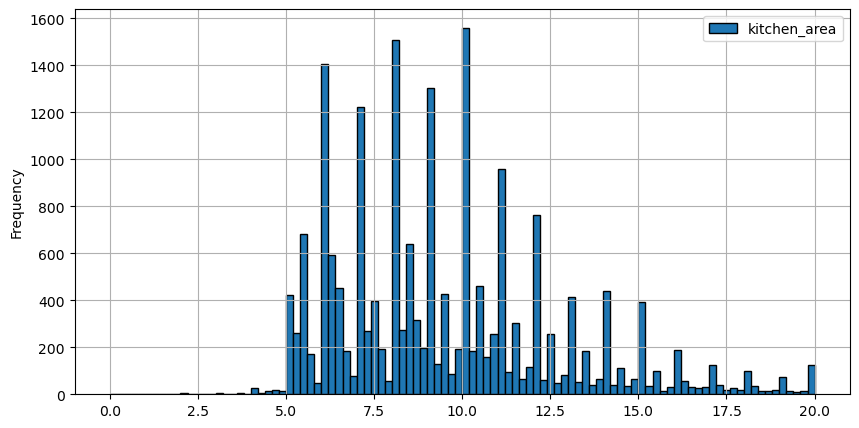

In [49]:
df.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (10,5), range = (0, 20), ec='black')
df['kitchen_area'].describe()

* Большая часть квартир имеет площадь кухни от 5 до 16 кв.м., пик приходится на 10 кв.м. Есть квартира в кторой кухня 100.7 кв.м, но это единичные выбросы

**Изучим цену**

count    22754.000000
mean      5410.566670
std       3184.651688
min         12.000000
25%       3400.000000
50%       4550.000000
75%       6500.000000
max      19999.000000
Name: last_price, dtype: float64

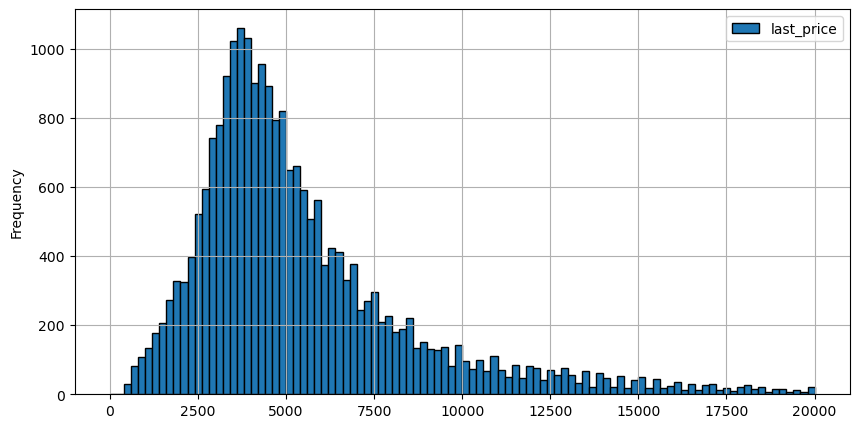

In [50]:
df.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,20000), figsize = (10,5),ec='black')
df['last_price'].describe()

* Цена на квартиры лежит в промежутке от 3 до 12 млн. Большаячасть квартир продается за цену в промежутке между 3 и 6 млн. Опять же, есть выбросы, но ничего.

**Изучим количество комнат**

count    22754.000000
mean         2.008878
std          0.974609
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

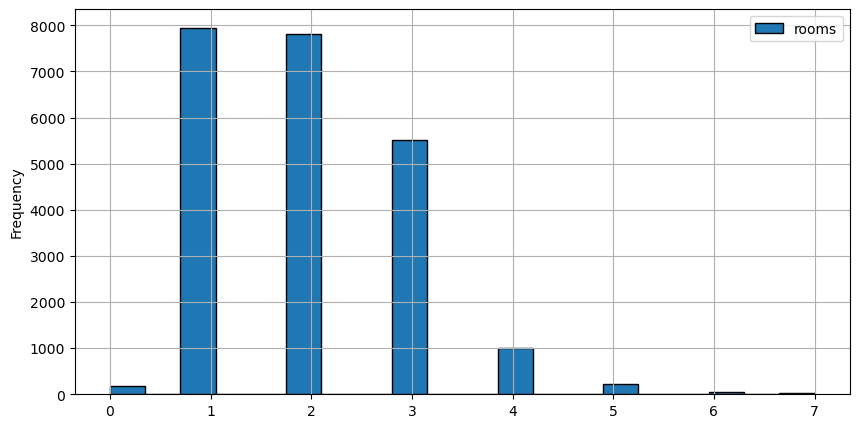

In [51]:
df.plot(y = 'rooms', kind = 'hist', bins = 20, grid=True, figsize = (10,5), ec='black')
df['rooms'].describe()

* 2/3 квартир имеют 1 или 2 комнаты, чуть меньший процент имеют 3 комнаты и небольшое количество - 4. Есть и квартиры, имеющие больше комнат, но их процент сильно ниже.

**Изучим высоту потолков**

count    22754.000000
mean         2.747042
std          0.201526
min          2.200000
25%          2.600000
50%          2.800000
75%          2.800000
max          4.800000
Name: ceiling_height, dtype: float64

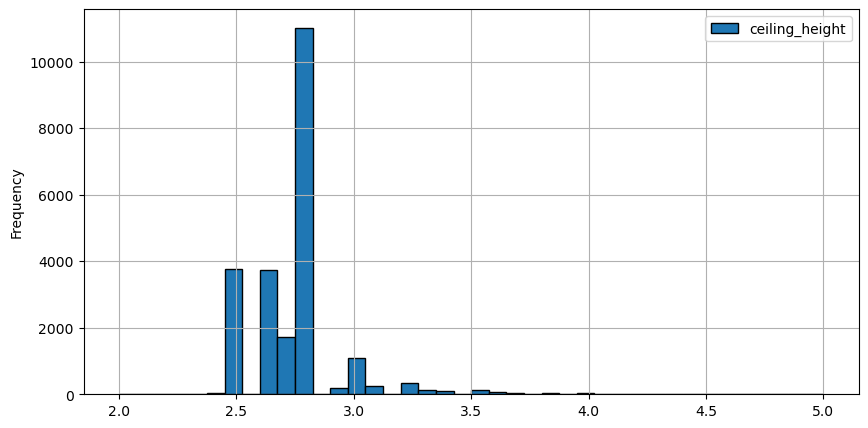

In [52]:
df.plot(y = 'ceiling_height', kind = 'hist', bins = 40, range = (2,5), grid=True, figsize = (10,5), ec='black')
df['ceiling_height'].describe()

* Квартиры, в большинстве своем, имеют потолки от 2,4-2,8м (самый популярный вариант) до 3,2м. Остальные случаи - эксклюзивы.

**Изучим количество этажей в доме**

count    22754.000000
mean        10.751209
std          6.628207
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

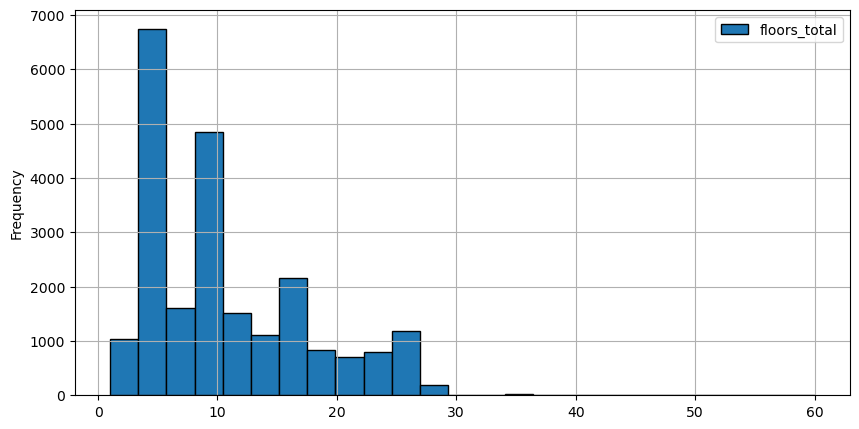

In [53]:
df.plot(y = 'floors_total', kind = 'hist', bins = 25, grid=True, figsize = (10,5) , ec='black')
df['floors_total'].describe()

* Большенство квартир на рынке в 5ти и 9ти и 16 этажных домах.

**Изучим растояние до цента**

count    22754.000000
mean        11.031247
std          9.716829
min          0.000000
25%          2.000000
50%         12.000000
75%         15.000000
max         66.000000
Name: cityCenters_nearest, dtype: float64

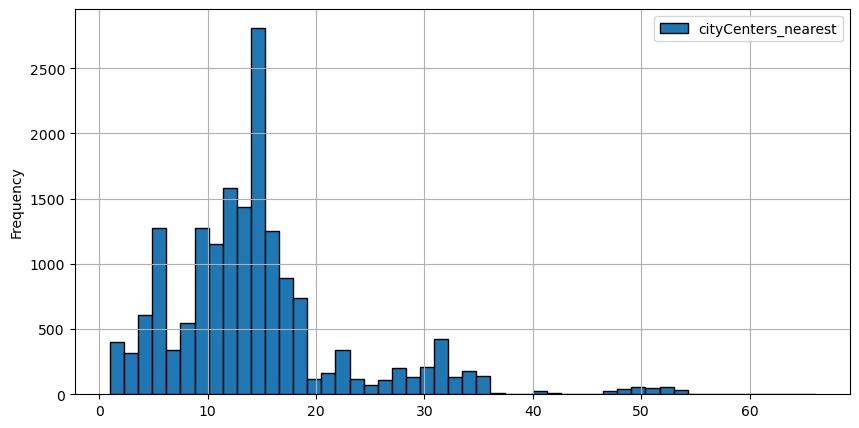

In [54]:
df.query('cityCenters_nearest != 0').plot(y = 'cityCenters_nearest', kind = 'hist', bins = 50, grid=True,
                                          figsize = (10,5), ec='black')
df['cityCenters_nearest'].describe()

* Большенство пердложений на рынке на ростаянии до 15 километров от центра.

**Изучим растояние до аэропорта**

count    22754.000000
mean     21925.946998
std      16635.861701
min          0.000000
25%       9692.250000
50%      21460.000000
75%      34618.000000
max      84869.000000
Name: airports_nearest, dtype: float64

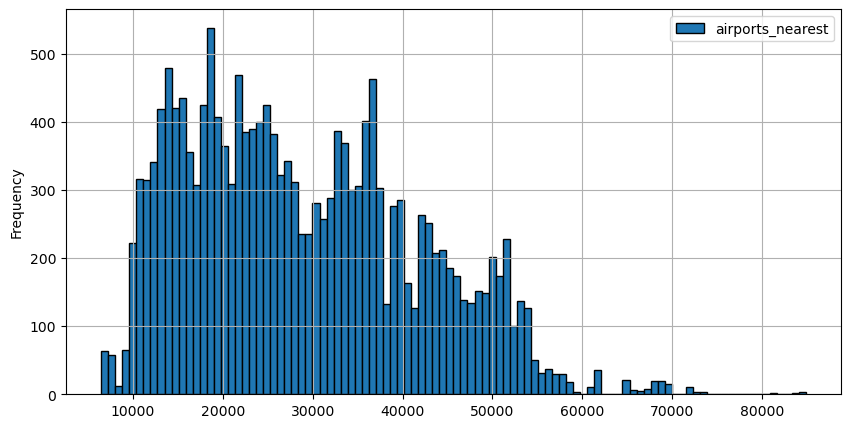

In [55]:
df.query('airports_nearest != 0').plot(y = 'airports_nearest', kind = 'hist', bins = 100, grid=True, 
                                              figsize = (10,5), ec='black')
df['airports_nearest'].describe()

* Большенство пердложений на рынке на ростаянии от 12 до 40 километров от аэропорта.

**Изучим растояние до парка**

count    7476.000000
mean      494.006822
std       341.711285
min         1.000000
25%       289.750000
50%       457.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

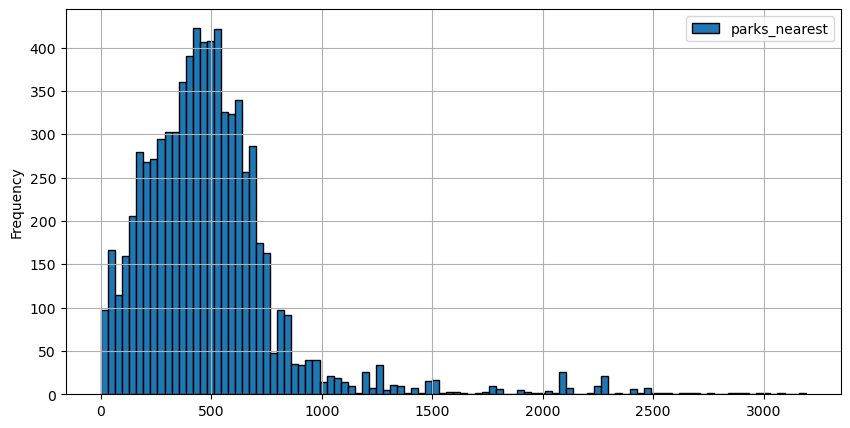

In [56]:
df.plot(y = 'parks_nearest', kind = 'hist', bins = 100, grid=True, figsize = (10,5), ec='black')
df['parks_nearest'].describe()

* Большенство пердложений на рынке в радиусе 1км.

**Изучим месяц публикации**

count    22754.000000
mean         6.400677
std          3.489309
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

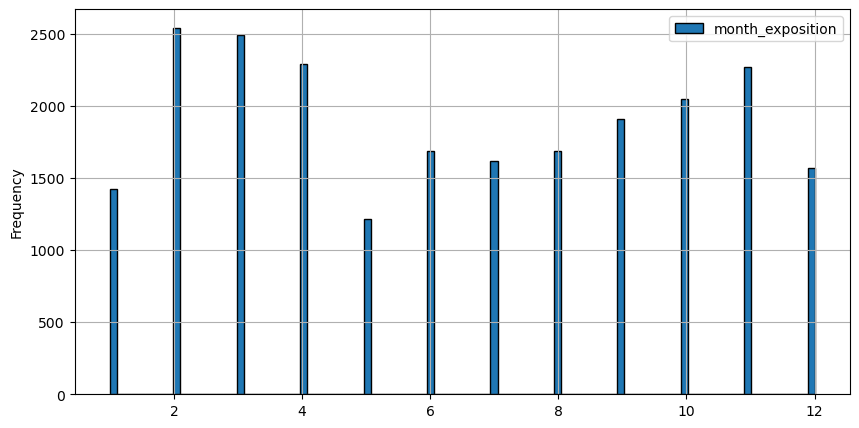

In [57]:
df.plot(y = 'month_exposition', kind = 'hist', bins = 100, grid=True, figsize = (10,5), ec='black')
df['month_exposition'].describe()

- Большенство публикаций приходится на `февраль`, `март`. 
* В целом больше объявлений публикуют ранней весной и осенью.

**Изучим день публикации**

count    22754.000000
mean         2.568164
std          1.788205
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday_exposition, dtype: float64

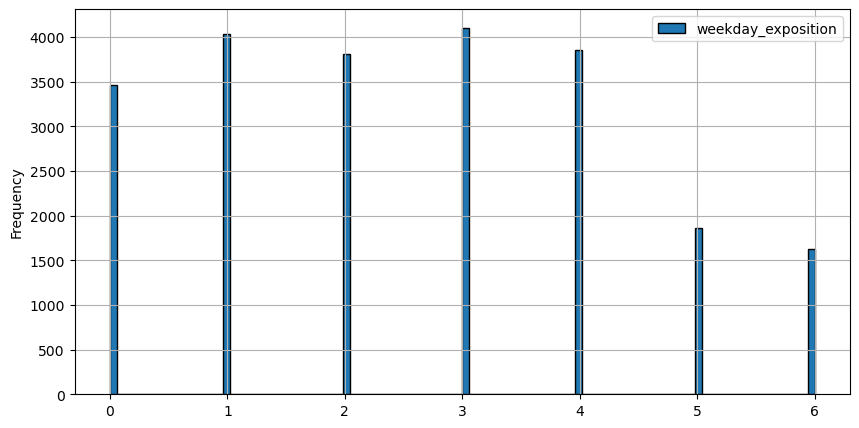

In [58]:
df.plot(y = 'weekday_exposition', kind = 'hist', bins = 100, grid=True, figsize = (10,5), ec='black')
df['weekday_exposition'].describe()

* Большенство публикаций приходится на рабочую неделю с пиком во `вторник` и `четверг`.

### 3.2 Задача 2. Посмотрим на данные и гистограмму по времени продажи квартиры

In [59]:
df['days_exposition'].describe().to_frame()

,days_exposition
count,19798.000000
mean,177.846904
std,216.525116
min,1.000000
25%,44.000000
50%,94.000000
75%,226.000000
max,1580.000000


In [60]:
df['days_exposition'].median()

94.0

* Есть квартиры, которые продавались 5 лет? 
* Вполне возможно, но, как я предполагал ранее, есть вероятность, что это те объявления, которые вовремя не были закрыты, из-за этого срок продажи не соответствует реальным и имеет очень большое значение.
* Среднее время продажи - полгода, 180 дней. Медианное - 94 дней.
* 3 месяца для продажи квартиры - очень неплохой срок.

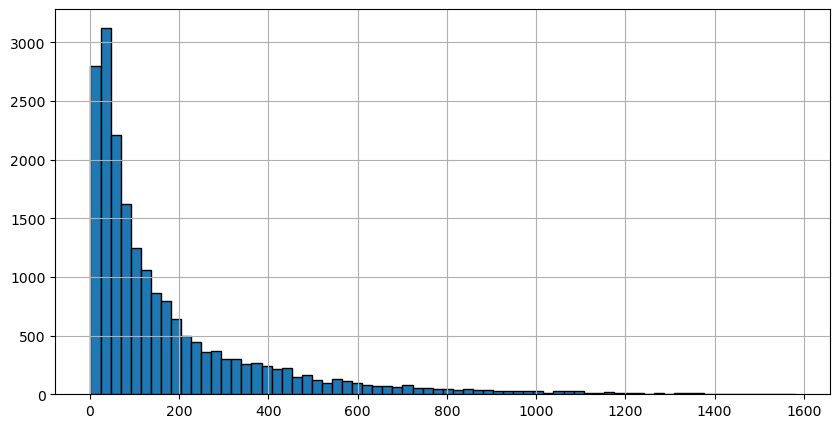

In [61]:
df['days_exposition'].hist(bins=70, figsize=(10,5), ec='black');

* Большая часть квартир продавалась в течение первых 50 дней, есть и квартиры, которые продавались до года. Чем дальше, тем реже встречаются такие случаи.

**Посмотрим на boxplot**

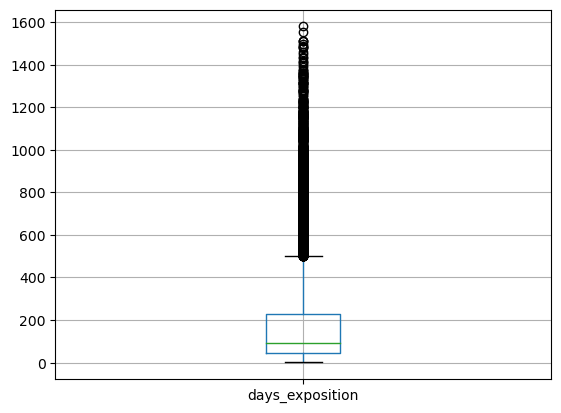

In [62]:
df.boxplot(column='days_exposition');

* Ограничим срок продажи 500 днями, чтоб убрать выбросы. Посмотрим на данные более детально

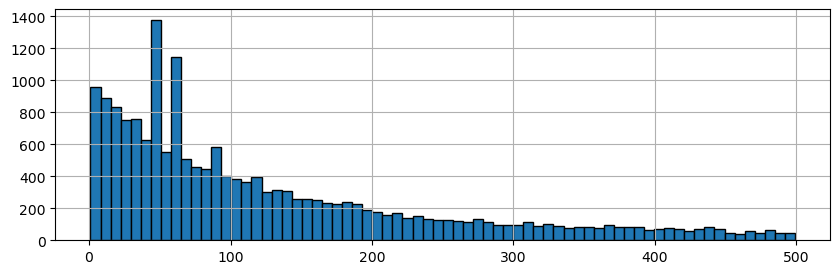

In [63]:
df.query('days_exposition<500')['days_exposition'].hist(bins=70, figsize=(10,3), ec='black');

* Всё осталось прежним - чаще всего квартиры продаются в срок от 45 до 60 дней.

### Вывод:

* Судя по гистограмме - мы имеем распределение Пуассона. Среднее значение - 180 дней, а медиана - 94 дней. 
* Сделав гистограмму со значениями от 0 до 500 с кол-вом корзин 70 обнаружил 2 пика на 45 и 60 дней соответственно большая часть объявлений снимается в срок до 60 дней.

### 3.3 Задача 3. Какие факторы больше всего влияют на стоимость квартиры?

**Зависимость цены от**
* `числа комнат`
* `этажа` 
* `общей площади`
* `жилой площади`
* `площади кухни` 
* `даты размещения объявления`

**Изучим зависимость цены от количества комнат:**

,mean,count,median
rooms,,,
0,3026.767956,181,2750.0
1,3800.938876,7951,3600.0
2,5323.058447,7802,4750.0
3,6937.032410,5523,6000.0
4,8916.796389,997,8200.0
5,11270.417040,223,11000.0
6,13829.517857,56,13325.5


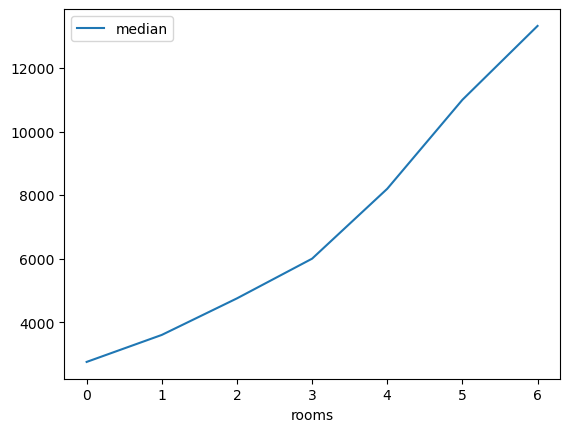

In [64]:
pivot_table_rooms = df.pivot_table(index = 'rooms', values = 'last_price' ,aggfunc = ['mean', 'count', 'median'])
#print(pivot_table_rooms)
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').plot(y = 'median')

pivot_table_rooms.query('count > 50').sort_values('median', ascending = True)



* Чем больше комнат, тем выше цена

**Изучим зависимость цены от общей площади квартиры**

0.7728740439202457

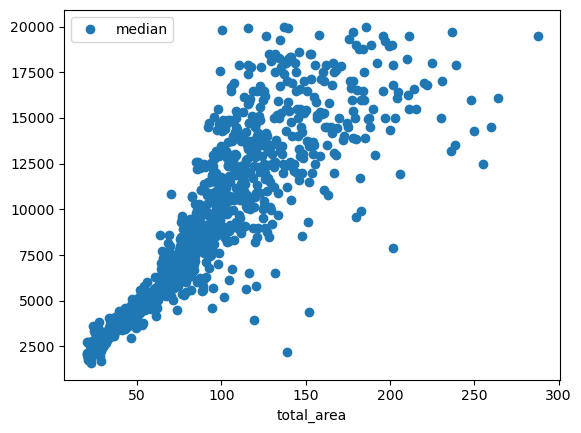

In [65]:
pivot_table_total_area = df.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median',  style = 'o')

pivot_table_total_area.sort_values('median', ascending = True)

df['total_area'].corr(df['last_price'])

* Видим, что зависимость средняя- согласно корреляции Пирсона - 0.77! То есть, чем больше площадь тем выше стоимость!

**Изучим зависимость цены  от жилой площади квартиры.**

0.6675181217670858

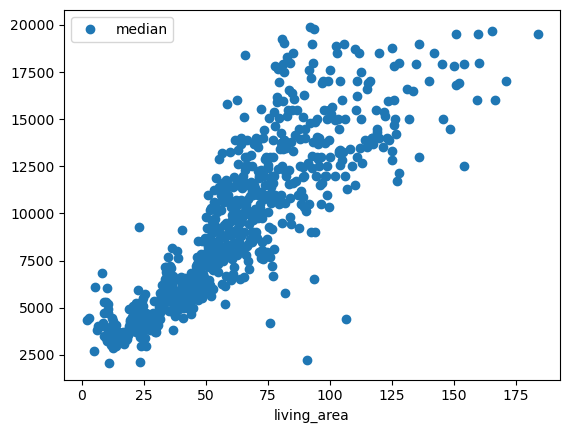

In [66]:
pivot_table_total_area = df.pivot_table(index = 'living_area', values = 'last_price', 
                                            aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median',  style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

df['living_area'].corr(df['last_price'])

* Видим, что зависимость средняя - согласно корреляции Пирсона - 0.66! То есть, чем больше жилая площадь тем выше стоимость!

**Изучим зависимость цены от площади кухни квартиры.**

0.5755973754122586

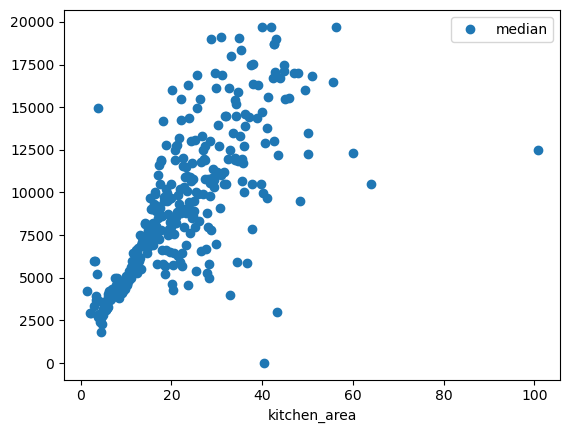

In [67]:
pivot_table_total_area = df.pivot_table(index = 'kitchen_area', values = 'last_price', 
                                            aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median',  style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

df['kitchen_area'].corr(df['last_price'])

* Видим, что зависимость средняя - согласно корреляции Пирсона - 0.57! То есть, чем больше площадь кухни тем выше стоимость!

**Изучим зависимость цены от этажа (первого или последнего)**

,mean,count,median
level,,,
другой,5640.948620,16738,4750
первый,4401.301880,2819,3900
последний,5094.327807,3197,4200


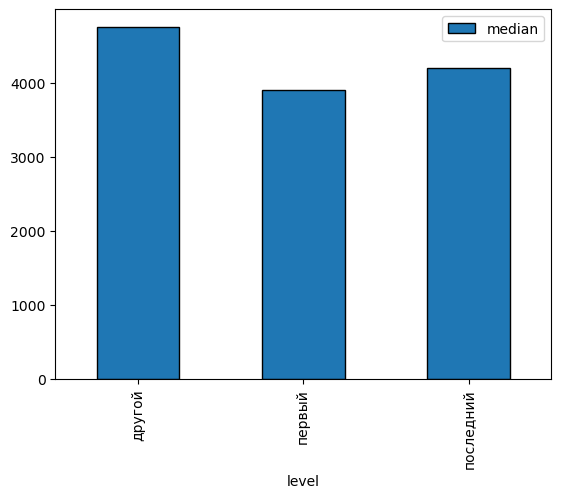

In [68]:
pivot_table_floor_category = df.pivot_table(index = 'level', values = 'last_price',  aggfunc = ['mean', 'count', 'median'])
                                                                          
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median' , kind= 'bar' , ec= 'black' )
pivot_table_floor_category

* Цены на квартиры на 1ом этаже в среднем на 15% ниже, чем цены на квартиры, расположенные на других этажах, кроме последнего. 
* На последнем этаже, конечно, подороже, чем на 1ом, но дешевле чем на других.

**Изучим зависимость от дня недели**

,mean,count,median
weekday_exposition,,,
1,5467.167905,4038,4650
2,5492.711473,3809,4600
0,5390.827795,3461,4580
3,5499.187530,4106,4550
4,5352.239119,3860,4500
5,5229.417653,1858,4500
6,5240.845869,1622,4500


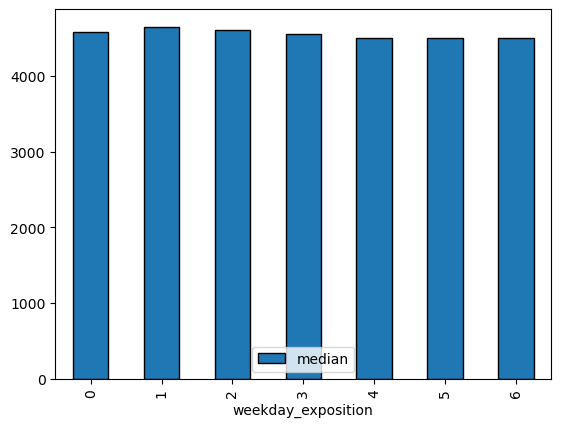

In [69]:
pivot_table_weekday_exposition = df.pivot_table(index = 'weekday_exposition', 
                                                    values = 'last_price', 
                                                    aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median' , kind= 'bar', ec= 'black')

pivot_table_weekday_exposition.sort_values('median', ascending = False)

* Цена от дня недели публикации практически никак не зависит. 
* Единственное, что можно сказать, так это то, что в среднем цены на квартиры, объявление о продажи которых опубликовано в будний день, чуть выше, чем цена на квартиры с объявлениями, опубликованными в выходные дни.

**Изучим зависимость цены от месяца**

,mean,count,median
month_exposition,,,
4,5529.732868,2291,4700
9,5570.210251,1912,4600
11,5444.714034,2273,4600
12,5412.478954,1568,4600
2,5382.071962,2543,4590
3,5394.229627,2491,4590
7,5394.847960,1618,4550
1,5366.408006,1424,4500
8,5426.078979,1684,4500


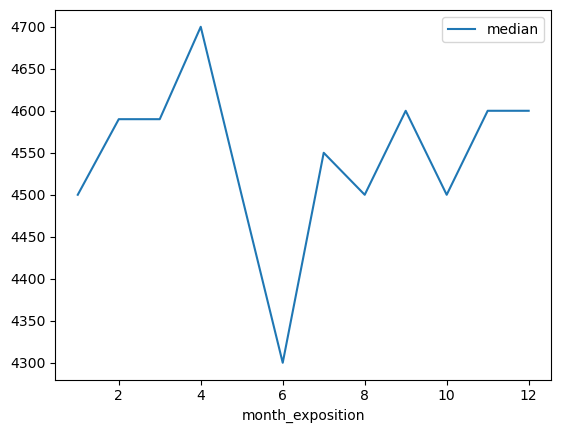

In [70]:
pivot_table_month_exposition = df.pivot_table(index = 'month_exposition', 
                                                    values = 'last_price', 
                                                    aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')

pivot_table_month_exposition.sort_values('median', ascending = False)

* Зависимость цены от месяца публикации такова
* **Апрель** оказался самым `"деловым"`: цены на квартиры, чьи объявления о продаже были опубликованы в апреле, выше, чем по остальным месяцам. 
* Особенно выделяется медиана цен на квартиры по июньским объявлениям - довольно низкие в сравнении с другими месяцами. 
* Наверное, это связано с отпусками.

**Изучим зависимость цены от года**

,mean,count,median
year_exposition,,,
2014,7956.034483,116,6445
2015,6129.654128,1090,5100
2019,5698.203035,2768,4994
2018,5277.820823,8260,4500
2017,5322.379490,7879,4420
2016,5378.779629,2641,4400


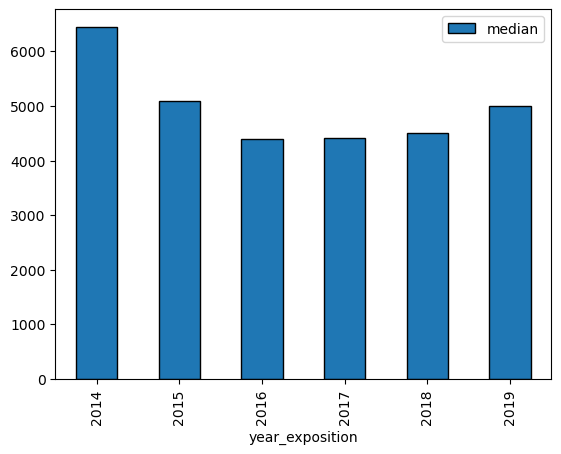

In [71]:
pivot_table_year_exposition = df.pivot_table(index = 'year_exposition', 
                                                    values = 'last_price', 
                                                    aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median' , kind= 'bar', ec= 'black')

pivot_table_year_exposition.sort_values('median', ascending = False)


* Видим, что 2014 сильно выделяется (мое мнение что это было вызвано ажиотажем на рынке недвижимости, вызванным довольно скоротечным ослаблением рубля)
* Потом до 2016 года цена падала, а после начала потихоньку расти.

### 3.4 Задача 4. Выберать 10 населённых пунктов с наибольшим числом объявлений.

* **Посчитаем среднюю цену квадратного метра в этих населённых пунктах.** 
* **Выделим населённые пункты с самой высокой и низкой стоимостью жилья.** 
* **Данные берем из столбца `locality_name`.**

In [72]:
top10 = df['locality_name'].value_counts().index.tolist()[:10]
mean10_metrics = [df[df['locality_name'] == city]['price_of_m2'].median()for city in top10]
mean10_prices = [df[df['locality_name'] == city]['last_price'].median() for city in top10]
frame = {'Город': top10, 'Средняя цена за кв.м., тыс. руб.': mean10_metrics, 'Средняя цена за квартиру, тыс. руб.': mean10_prices}
dataframe = pd.DataFrame(frame).sort_values(by='Средняя цена за кв.м., тыс. руб.', ascending=False)
dataframe

,Город,"Средняя цена за кв.м., тыс. руб.","Средняя цена за квартиру, тыс. руб."
0,Санкт-Петербург,0.1030,5400.0
4,Пушкин,0.0990,5150.0
8,деревня Кудрово,0.0915,3790.0
6,поселок Парголово,0.0910,4100.0
1,поселок Мурино,0.0860,3400.0
2,поселок Шушары,0.0760,3950.0
5,Колпино,0.0740,3600.0
7,Гатчина,0.0670,3095.0
3,Всеволожск,0.0650,3450.0
9,Выборг,0.0580,2900.0


* Как и ожидалось, самые дорогие квартиры (что за всё жилье, что за 1 кв.м.) в Санкт-Петербурге и парковом городе Пушкине.
* Чем дальше от города, тем дешевле. 
* В Выборге средняя цена за квадратный метр в 2 раз ниже, чем в Санкт-Петербурге.

### 3.5 Задача 5.Выделить квартиры в Санкт-Петербурге и вычислите среднюю цену каждого километра

**Выделяем квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километраь **

In [73]:
df_spb = df.query('locality_name == "Санкт-Петербург"')
df_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_of_m2,year_exposition,month_exposition,weekday_exposition,level,living_area_part,kitchen_area_part
0,20,13000,108.0,2019-03-07,3,2.7,16,51.0,8,NaN,False,False,25.0,0,Санкт-Петербург,18863,16,1.0,482.0,2.0,755.0,NaN,0.120,2019,3,3,другой,0.47,0.23
2,10,5196,56.0,2015-08-20,2,2.8,5,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741,14,1.0,90.0,2.0,574.0,558.0,0.092,2015,8,3,другой,0.61,0.15
4,2,10000,100.0,2018-06-19,2,3.0,14,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,31856,8,2.0,112.0,1.0,48.0,121.0,0.100,2018,6,1,другой,0.32,0.41
7,5,7915,71.6,2019-04-18,2,2.8,24,NaN,22,NaN,False,False,18.9,2,Санкт-Петербург,23982,12,0.0,NaN,0.0,NaN,NaN,0.110,2019,4,3,другой,NaN,0.26
9,18,5400,61.0,2017-02-26,3,2.5,9,43.6,7,NaN,False,False,6.5,2,Санкт-Петербург,50898,15,0.0,NaN,0.0,NaN,289.0,0.088,2017,2,6,другой,0.71,0.11


**Строим график медианной цены в зависимости от удаленности от города**

,price_of_m2
cityCenters_nearest,
0,0.122217
1,0.127727
2,0.121769
3,0.112469
4,0.120267
5,0.124837
6,0.126325
7,0.123307
8,0.120066


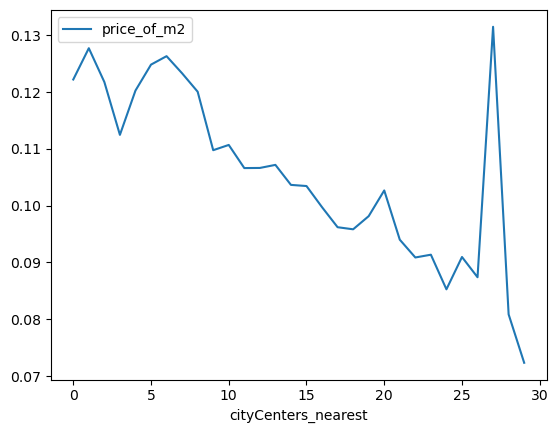

In [74]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(999999)
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('int')
pivot_table_km = df.query('locality_name == "Санкт-Петербург" and  cityCenters_nearest !=999999') .pivot_table(
                                                                                               index = 'cityCenters_nearest', 
                                                                                               values = 'price_of_m2', 
                                                                                               aggfunc = 'mean')
pivot_table_km.plot()
pivot_table_km

* Ожидаемо, что в самом центре (в радиусе до 2км) средняя цена на m2 самая высокая.
* В радиусе от 3км до 7км цена чуть ниже, 
* Hу а после 7км цена закономерно уменьшается.
* Пик на 27км скорее всего связан с тем что там распологается какой нибудь котеджный поселок.

# 4. Общий вывод

* Мы обработали полученный архив данных - обработали пропущенные значения там, где это необходимо, заменили типы данных на необходимые для удобной работы. 
* Посчитали и добавили в таблицу цену квадратного метра жилья, вывели из даты дни недели, месяцы и года размещения объявлений, добавили категории по этажам квартир.
* Изучая время продажи квартир мы выявили, что большое количество объявлений было  снято с размещния до 60 дней дату из снятия нельзя считать датой продажи квартиры, потому что, изучая средние сроки продажи квартир - данные значения не учитывались.
* Мы выявили при помощи диаграммы размаха, что нормальные значения продажи квартир варьируются от 1 до 500 дней. Мы выявили, что на стоимость квадратного метра квартиры больше всего влияют количество комнат, этаж квартиры, близость к центру. 
* Незначительно на стоимость квадратного метра влияют день, месяц, год размещения и общая площадь. Нужно учитывать, что в 2016-2017 годах стоимость квартир в среднем по рынку была ниже на 10-20 %. В дальнейшем имеет место постоянное удорожание стоимости, начиная с 2018 года. 

* Также важно учитывать, что, рассматривая среднюю стоимость квартир в 2014-2019 годах, мы не делали сегментацию рынка, а лишь смотрели средние показатели по рынку в целом.
* Т.е. возможно, что цены на аналогичные квартиры в разных годах вели себя абсолютно по-разному.
* Т.е. например в то время, когда средняя стоимость метра по рынку в 2016-2017 годах была наиболее низкой, какие-то аналогичные прошлым годам квартиры могли и не падать в цене, а наоборот дорожать! 